In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
import scipy.stats
from matplotlib import gridspec
import matplotlib.lines as mlines

plt.rcParams["font.family"] = "serif"
label_font_size= 28
tick_font_size= 15
text_font_size= 22

def getContour(x,y,z,val):
    N=1000

    levels = [val]

    xi = np.linspace(x.min(), x.max(), N)
    yi = np.linspace(y.min(), y.max(), N)
    zi = scipy.interpolate.griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

    cs = plt.contour(xi,yi,zi,levels, colors='black', linewidth=.5)
    
    p = cs.collections[0].get_paths()[0]
    v = p.vertices
    return v

In [4]:
# Load LSND and global fit
lsnd1=np.genfromtxt("limits/LSND_1.csv", delimiter=',')
lsnd2=np.genfromtxt("limits/LSND_2.csv", delimiter=',')
lsnd3=np.genfromtxt("limits/LSND_3.csv", delimiter=',')

gui1_mue=np.genfromtxt("globfits/guinti_glob_0_mue.csv", delimiter=',')
gui2_mue=np.genfromtxt("globfits/guinti_glob_1_mue.csv", delimiter=',')
gui3_mue=np.genfromtxt("globfits/guinti_glob_2_mue.csv", delimiter=',')

gui1_mumu=np.genfromtxt("globfits/guinti_glob_0_mumu.csv", delimiter=',')
gui2_mumu=np.genfromtxt("globfits/guinti_glob_2_mumu.csv", delimiter=',')
gui3_mumu=np.genfromtxt("globfits/guinti_glob_3_mumu.csv", delimiter=',')

# Nue Appearance

In [7]:
str_date = 'Jul 13, 2018'
str_tag = 'DL Review'

cLSNDb = 'yellowgreen'
cLSND = 'olivedrab'

cGIUNTI = 'darkturquoise'
cGIUNTIb = 'aqua'

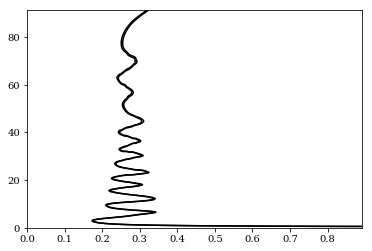

In [68]:
# Load my stuff
dl_nueapp=np.genfromtxt("/home/dcianci/Physics/DLLEE/Sensitivity/whipping_star/build/lee/output_nueapp/chi2_nueapp.dat")
cont_dl_nueapp = getContour(dl_nueapp[:,4],dl_nueapp[:,1],dl_nueapp[:,5],1.28)

dl_nueapp_statsonly=np.genfromtxt("/home/dcianci/Physics/DLLEE/Sensitivity/whipping_star/build/lee/output_nueapp/chi2_nueapp_statsonly.dat")
cont_dl_nueapp_statsonly = getContour((dl_nueapp_statsonly[:,4]),dl_nueapp_statsonly[:,1],dl_nueapp_statsonly[:,5],1.28)

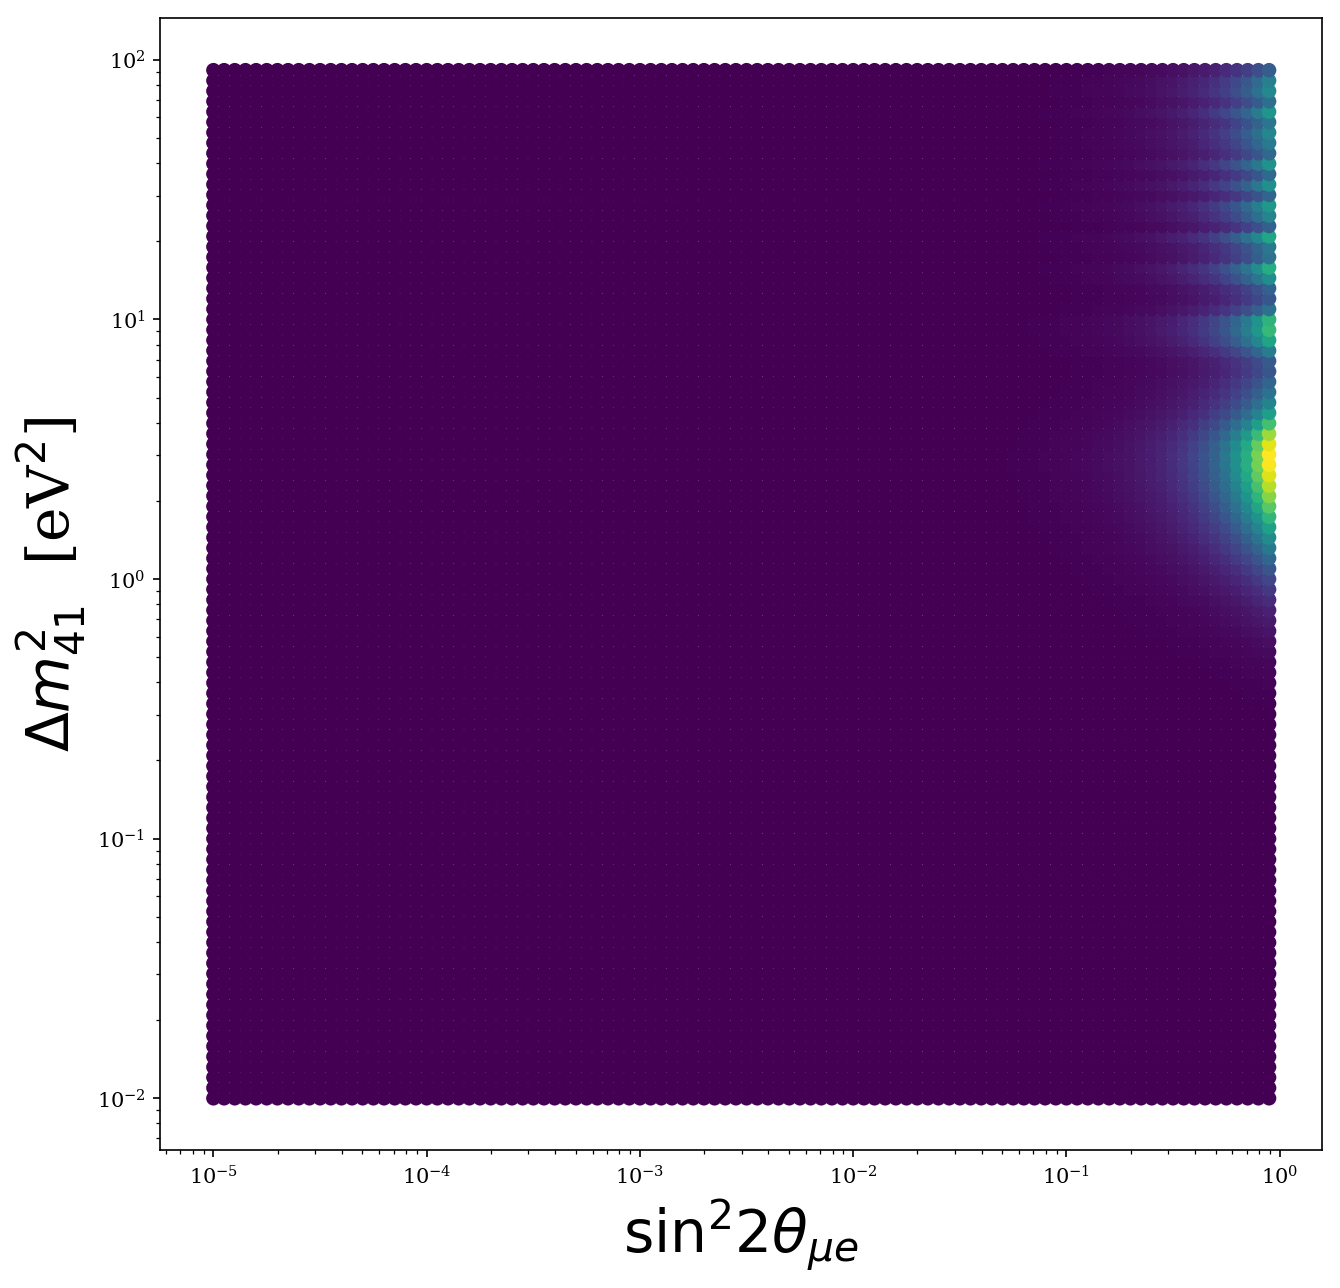

In [69]:
# Dumb test
f=plt.figure(figsize=(10,10), dpi=150)

ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=label_font_size)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=label_font_size)


plt.scatter(dl_nueapp[:,4],dl_nueapp[:,1],c=dl_nueapp[:,5])

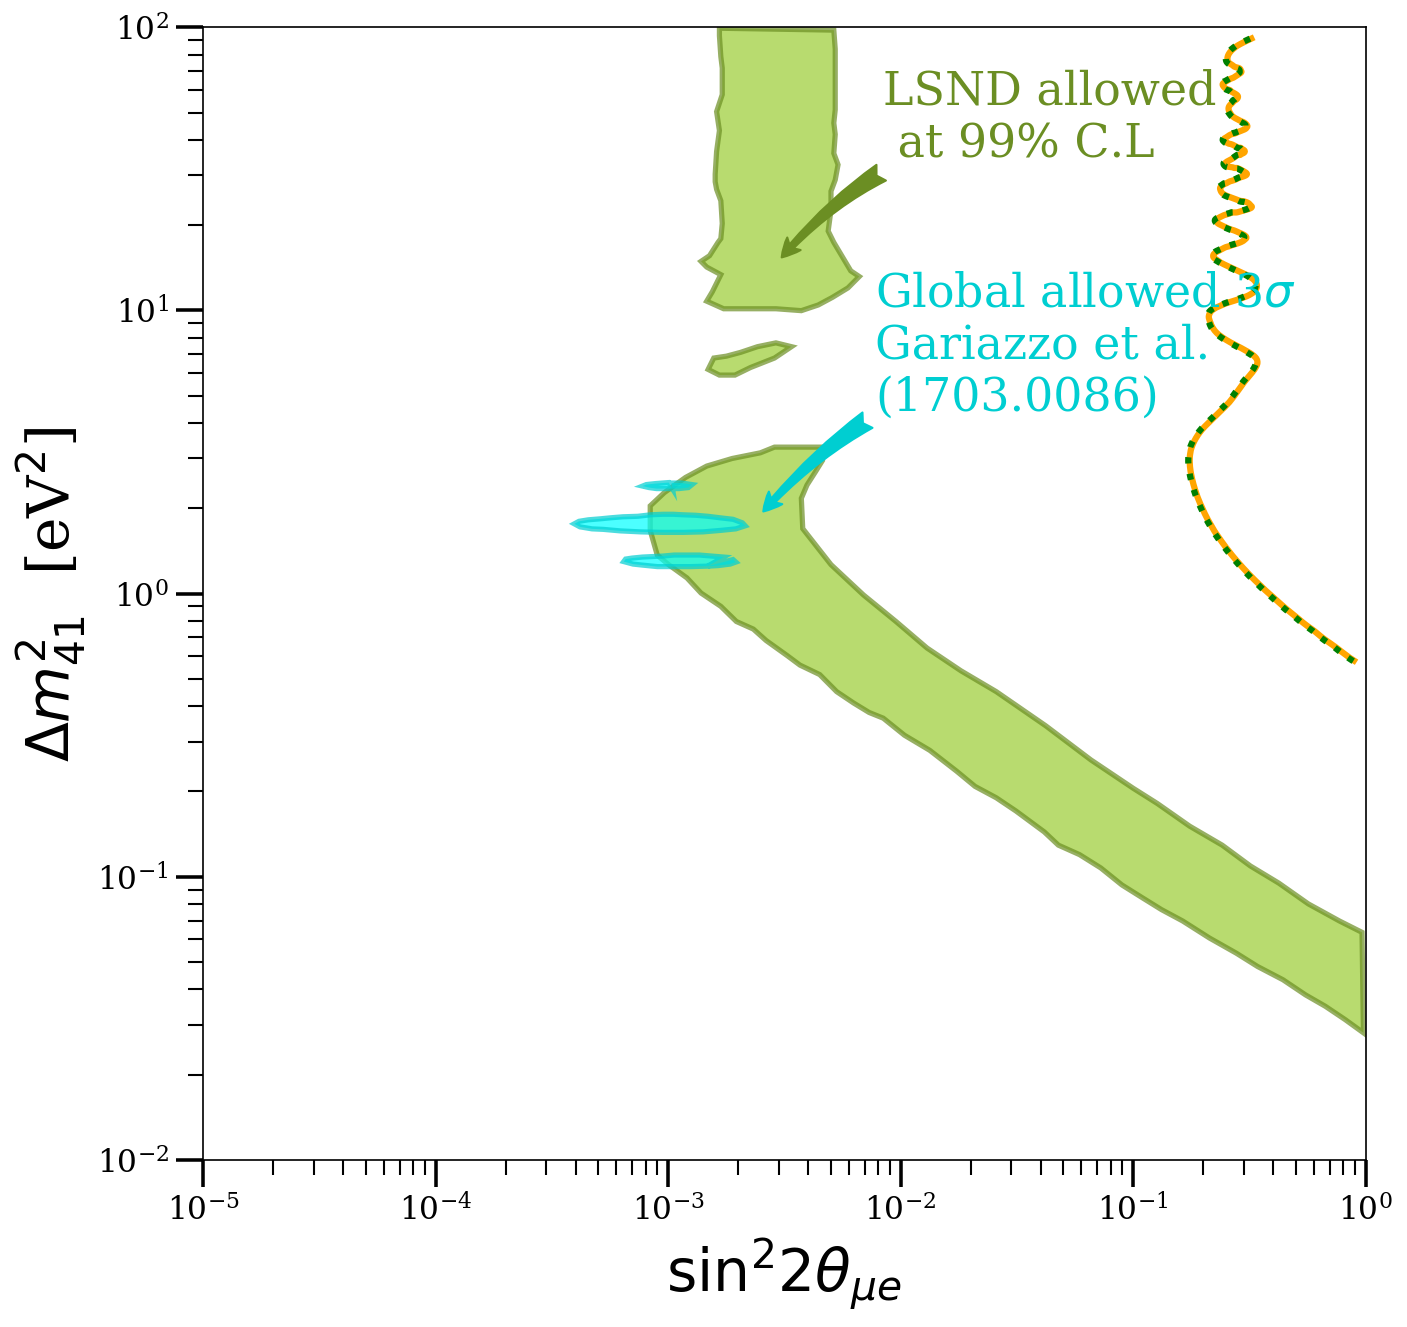

In [70]:
# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(10,10), dpi=150)

ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=label_font_size)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=label_font_size)

#Draw LSND 
plt.fill(lsnd1[:,0],lsnd1[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5, linestyle="-",alpha=0.7)
plt.fill(lsnd2[:,0],lsnd2[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.fill(lsnd3[:,0],lsnd3[:,1], edgecolor=cLSND, facecolor=cLSNDb, linewidth=2.5,  linestyle="-",alpha=0.7)

plt.annotate('LSND allowed\n at 99% C.L',
             xy=(3e-3, 15), xycoords='data',color=cLSND,
             xytext=(+50, +50), textcoords='offset points', fontsize=text_font_size,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=cLSND,))

#Draw giunti global fit
plt.fill(gui1_mue[:,0],gui1_mue[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5, linestyle="-",alpha=0.7)
plt.fill(gui2_mue[:,0],gui2_mue[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.fill(gui3_mue[:,0],gui3_mue[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5,  linestyle="-",alpha=0.7)

plt.annotate('Global allowed 3$\sigma$\nGariazzo et al.\n(1703.0086)',
             xy=(2.5e-3, 1.9), xycoords='data',color=cGIUNTI,
             xytext=(+55, +50), textcoords='offset points', fontsize=text_font_size,
             arrowprops=dict(arrowstyle="fancy", connectionstyle="arc3,rad=.2",color=cGIUNTI))


plt.plot(cont_dl_nueapp[:,0], cont_dl_nueapp[:,1],  color='orange' ,linewidth=3, linestyle="-")

plt.plot(cont_dl_nueapp_statsonly[:,0], cont_dl_nueapp_statsonly[:,1],  color='green' ,linewidth=3, linestyle=":")


# Set axis limits and 
plt.xlim(1e-5,1)
plt.ylim(0.01,100)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )


# Show result on screen
plt.show()
f.savefig("dl_sens.pdf", bbox_inches='tight')


# Numu Disappearance

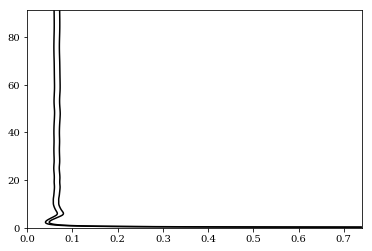

In [71]:
# Load my stuff
dl_numudis=np.genfromtxt("/home/dcianci/Physics/DLLEE/Sensitivity/whipping_star/build/lee/output_numudis/chi2_numudis.dat")
cont_dl_numudis = getContour((dl_numudis[:,3]),dl_numudis[:,1],dl_numudis[:,4],1.28)


dl_numudis_statsonly=np.genfromtxt("/home/dcianci/Physics/DLLEE/Sensitivity/whipping_star/build/lee/output_numudis/chi2_numudis_statsonly.dat")
cont_dl_numudis_statsonly = getContour((dl_numudis_statsonly[:,3]),dl_numudis_statsonly[:,1],dl_numudis_statsonly[:,4],1.28)


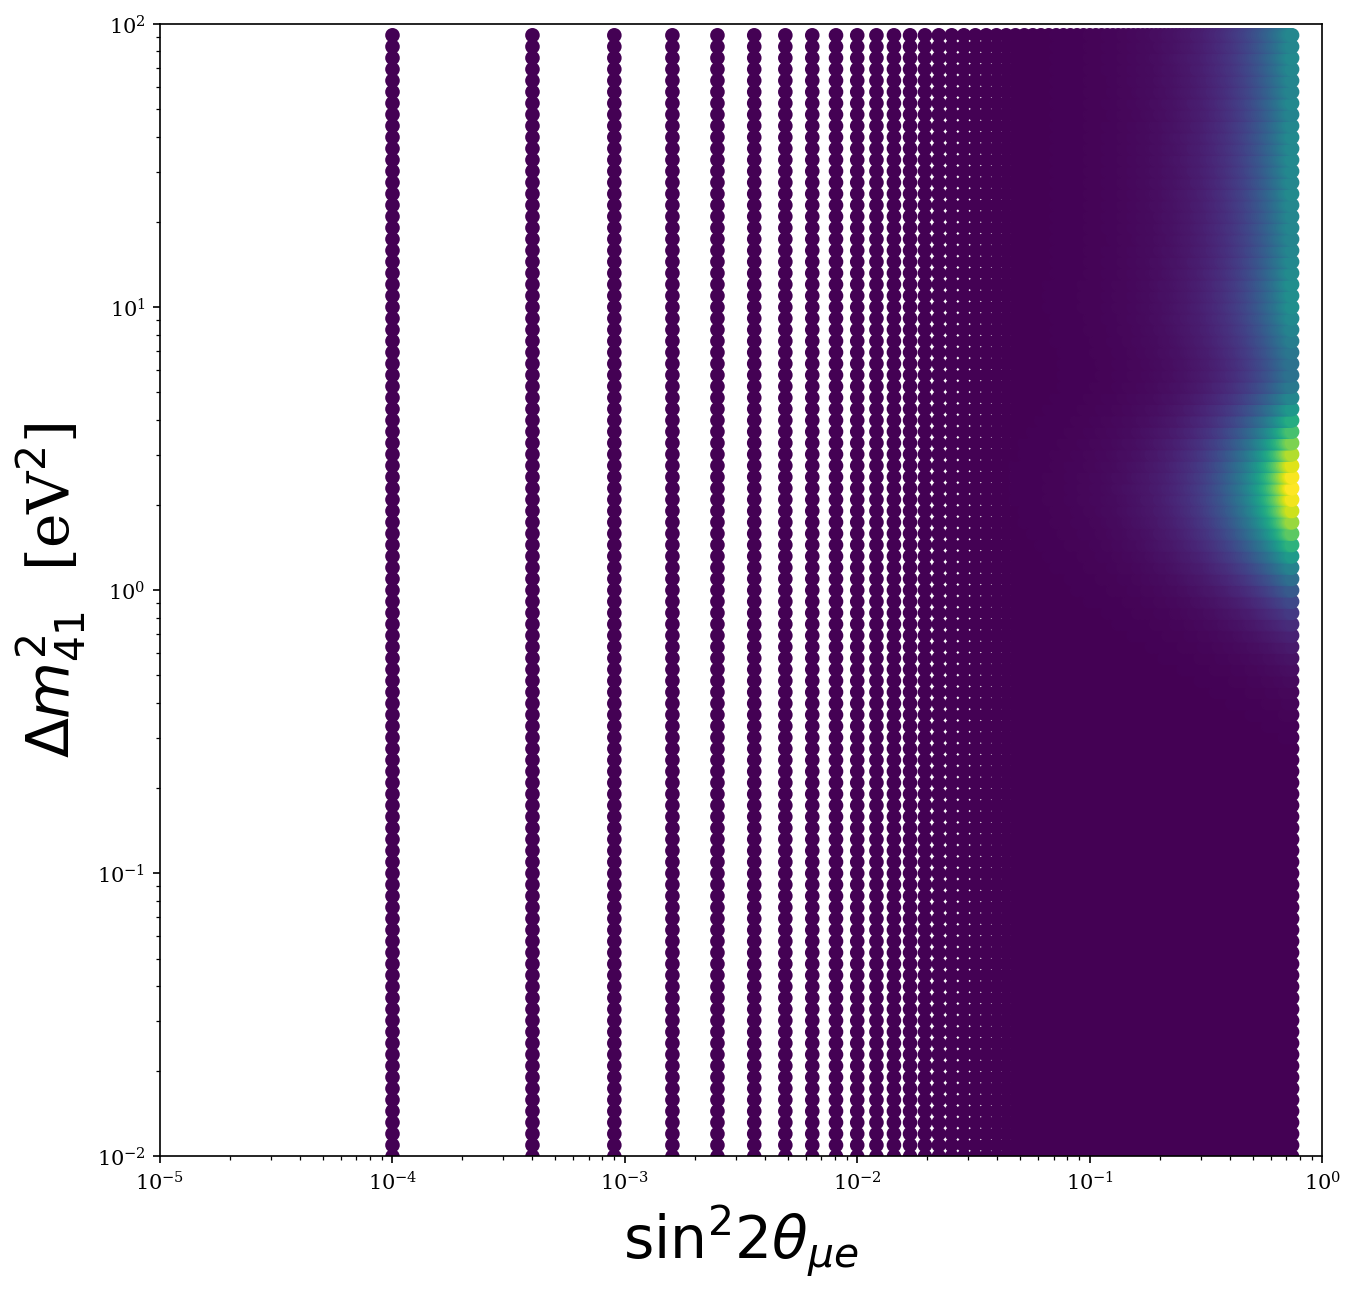

In [72]:
# Dumb test
f=plt.figure(figsize=(10,10), dpi=150)

ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

plt.xlim(1e-5,1)
plt.ylim(0.01,100)

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu e}$',fontsize=label_font_size)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=label_font_size)


plt.scatter(dl_numudis_statsonly[:,3],dl_numudis_statsonly[:,1],c=dl_numudis_statsonly[:,4])

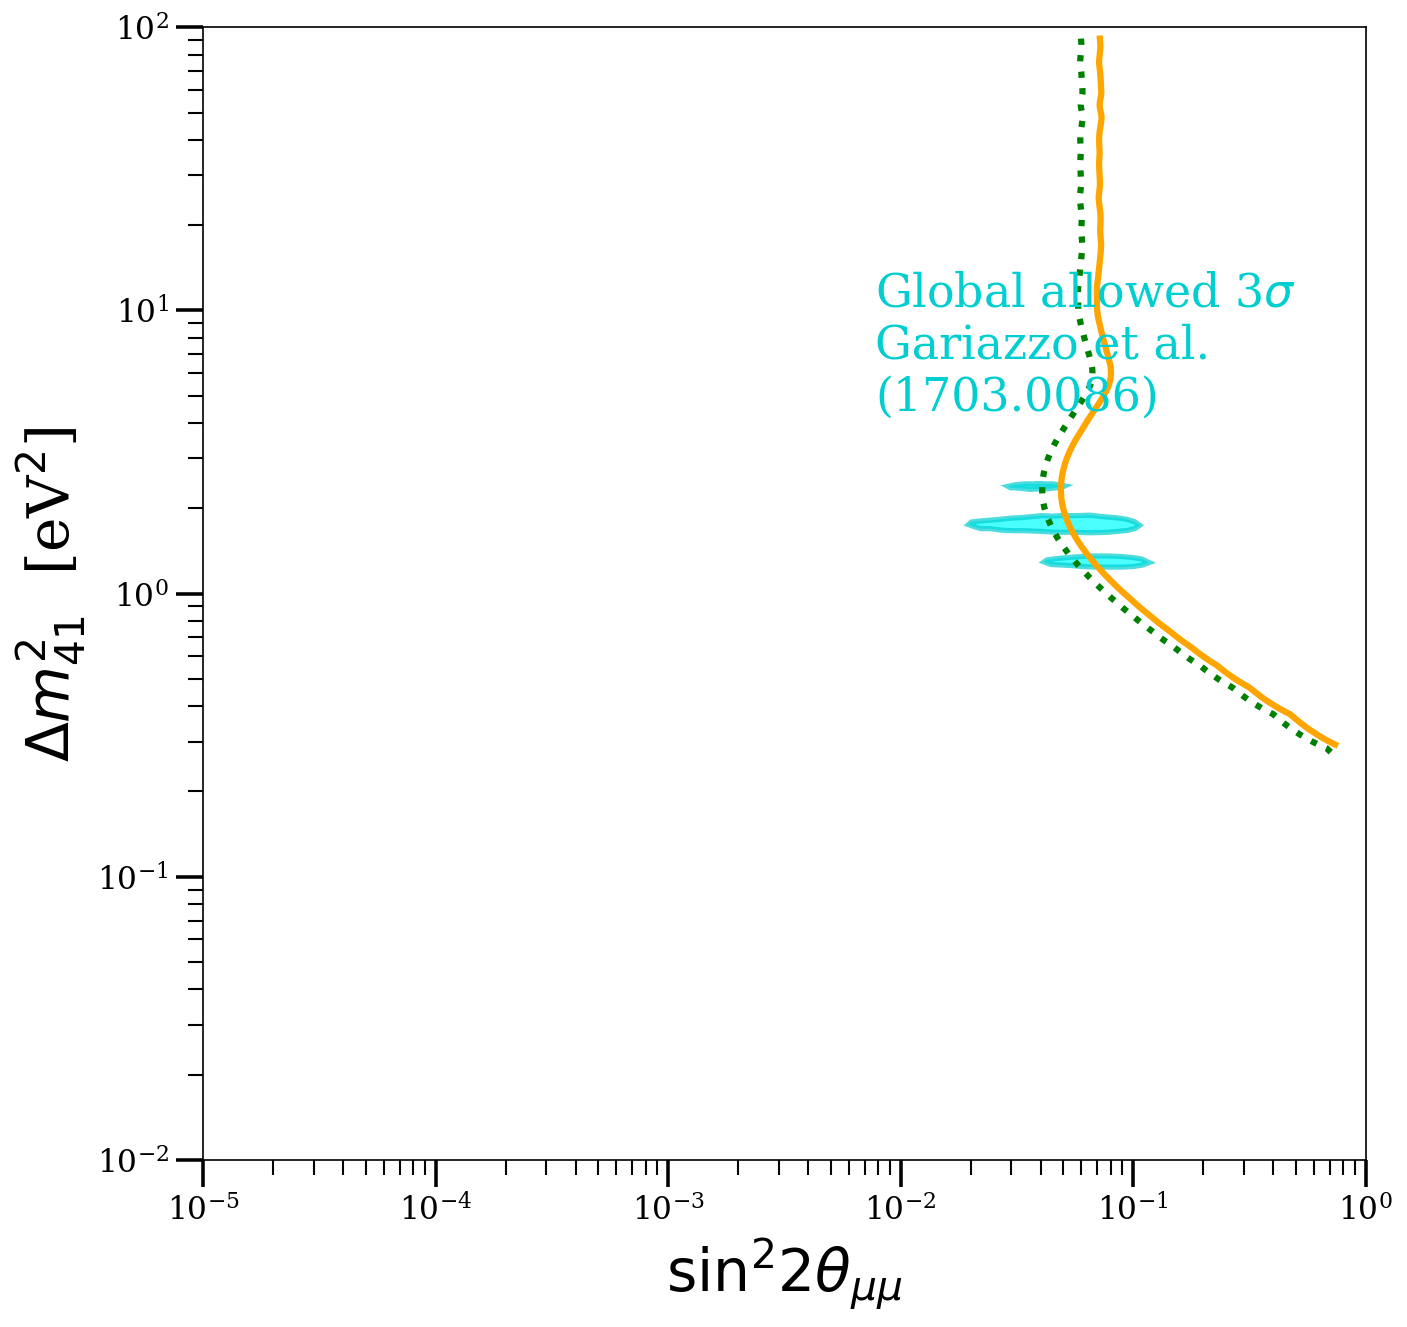

In [73]:
# Create a new subplot from a grid of 1x1
f=plt.figure(figsize=(10,10), dpi=150)

ax=plt.subplot(111)
ax.set_xscale("log", nonposx='clip')
ax.set_yscale("log", nonposy='clip')

ax.set_xlabel(r'$\sin^2 2 \theta_{\mu \mu}$',fontsize=label_font_size)
ax.set_ylabel(r'$\Delta m_{41}^2$  [eV$^2$]',fontsize=label_font_size)

#Draw giunti global fit
plt.fill(gui1_mumu[:,0],gui1_mumu[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5, linestyle="-",alpha=0.7)
plt.fill(gui2_mumu[:,0],gui2_mumu[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5,  linestyle="-",alpha=0.7)
plt.fill(gui3_mumu[:,0],gui3_mumu[:,1], edgecolor=cGIUNTI, facecolor=cGIUNTIb, linewidth=2.5,  linestyle="-",alpha=0.7)

plt.annotate('Global allowed 3$\sigma$\nGariazzo et al.\n(1703.0086)',
             xy=(2.5e-3, 1.9), xycoords='data',color=cGIUNTI,
             xytext=(+55, +50), textcoords='offset points', fontsize=text_font_size,
             )

plt.plot(cont_dl_numudis[:,0], cont_dl_numudis[:,1],  color='orange' ,linewidth=3, linestyle="-")

plt.plot(cont_dl_numudis_statsonly[:,0], cont_dl_numudis_statsonly[:,1],  color='green' ,linewidth=3, linestyle=":")


# Set axis limits and 
plt.xlim(1e-5,1)
plt.ylim(0.01,100)

ax.tick_params('both',labelsize=tick_font_size)
ax.tick_params('both',length=7, width=1, which='minor' )
ax.tick_params('both',length=13, width=1.7, which='major' )


# Show result on screen
plt.show()
f.savefig("dl_sens.pdf", bbox_inches='tight')
